# BTC ANALYSIS

<big>In this notebook we explore the history of Bitcoin. In the first part, we check the data, perform some basic changes to them while also taking a peek into
    sales history of BTC.The main analysis is conducted in the second part where we compare different kind of prices and we study the evolution of these values
    from the release of Bitcoin until the start of 2021</big>


## Part 1: Data inspection / Data cleaning

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt

In [19]:
PATH = 'data/bitcoin.csv'
df  = pd.read_csv(PATH)   # first we get the fetch the data and store them to a dataframe
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,EMA10,EMA30,ATR
0,2013-04-29,134.44,147.49,134.00,144.54,0.0,1.603769e+09,144.540000,144.540000,13.490000
1,2013-04-30,144.00,146.93,134.05,139.00,0.0,1.542813e+09,143.532727,144.182581,13.446429
2,2013-05-01,139.00,139.89,107.72,116.99,0.0,1.298955e+09,138.706777,142.428221,14.783827
3,2013-05-02,116.38,125.60,92.28,105.21,0.0,1.168517e+09,132.616454,140.027045,16.107839
4,2013-05-03,106.25,108.13,79.10,97.75,0.0,1.085995e+09,126.277099,137.299494,17.030850


In [20]:
# to get some statistical information about the dataframe
print('Shape: ', df.shape)
df.describe()

Shape:  (2861, 10)


,Open,High,Low,Close,Volume,Market Cap,EMA10,EMA30,ATR
count,2861.000000,2861.000000,2861.000000,2861.000000,2.861000e+03,2.861000e+03,2861.000000,2861.000000,2861.000000
mean,4821.790304,4958.942593,4680.933446,4837.640570,8.919231e+09,8.564526e+10,4759.573459,4606.478848,260.693841
std,6891.191378,7144.411715,6625.059262,6933.355664,1.649951e+10,1.279454e+11,6664.462366,6151.533558,487.911054
min,68.500000,74.560000,65.530000,68.430000,0.000000e+00,7.784112e+08,80.355077,93.126246,3.555432
25%,421.170000,426.000000,415.640000,420.950000,2.779130e+07,5.977546e+09,420.056164,415.542820,13.777881
50%,1180.040000,1197.210000,1163.390000,1182.680000,3.296310e+08,1.922936e+10,1167.544745,1130.237694,73.443407
75%,7922.150000,8136.950000,7696.930000,7923.640000,1.293900e+10,1.386610e+11,7822.560714,7854.929265,307.902802
max,57532.740000,58330.570000,55672.610000,57539.940000,3.509679e+11,1.072263e+12,52295.395745,45755.139028,3897.423932


In [21]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap    float64
EMA10         float64
EMA30         float64
ATR           float64
dtype: object

In [22]:
# to get the data a litle bit easier to read
df['Market Cap'] = df['Market Cap'] / 1000   # so now, market capitalization is measured in thousands(K)
df['Volume'] = df['Volume'] / 1000    # again, volume (which means number of transactions) is measured in thousands


In [25]:
# we can also change the Date type to be an actual date
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
df.head()  # now we canm check the data again

,Date,Open,High,Low,Close,Volume,Market Cap,EMA10,EMA30,ATR
0,2013-04-29,134.44,147.49,134.00,144.54,0.0,1603768.865,144.540000,144.540000,13.490000
1,2013-04-30,144.00,146.93,134.05,139.00,0.0,1542813.125,143.532727,144.182581,13.446429
2,2013-05-01,139.00,139.89,107.72,116.99,0.0,1298954.594,138.706777,142.428221,14.783827
3,2013-05-02,116.38,125.60,92.28,105.21,0.0,1168517.495,132.616454,140.027045,16.107839
4,2013-05-03,106.25,108.13,79.10,97.75,0.0,1085995.169,126.277099,137.299494,17.030850


In [27]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap,EMA10,EMA30,ATR
count,2861.000000,2861.000000,2861.000000,2861.000000,2.861000e+03,2.861000e+03,2861.000000,2861.000000,2861.000000
mean,4821.790304,4958.942593,4680.933446,4837.640570,8.919231e+06,8.564526e+07,4759.573459,4606.478848,260.693841
std,6891.191378,7144.411715,6625.059262,6933.355664,1.649951e+07,1.279454e+08,6664.462366,6151.533558,487.911054
min,68.500000,74.560000,65.530000,68.430000,0.000000e+00,7.784112e+05,80.355077,93.126246,3.555432
25%,421.170000,426.000000,415.640000,420.950000,2.779130e+04,5.977546e+06,420.056164,415.542820,13.777881
50%,1180.040000,1197.210000,1163.390000,1182.680000,3.296310e+05,1.922936e+07,1167.544745,1130.237694,73.443407
75%,7922.150000,8136.950000,7696.930000,7923.640000,1.293900e+07,1.386610e+08,7822.560714,7854.929265,307.902802
max,57532.740000,58330.570000,55672.610000,57539.940000,3.509679e+08,1.072263e+09,52295.395745,45755.139028,3897.423932


In [28]:
# check for missing values - theoretically there should't be any since the dataset is already clean
df[df.isna() == True].count()   # for each column, return number of empty values

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
EMA10         0
EMA30         0
ATR           0
dtype: int64

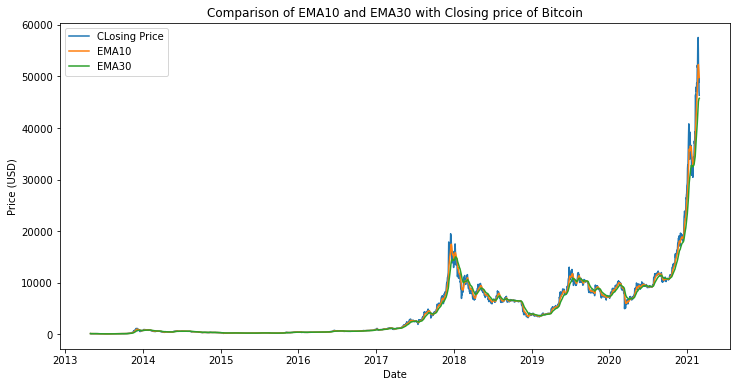

In [33]:
# we can also check the validity of EMA10 and EMA30, since their plot should follow the closing price plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='CLosing Price')   # create closing price line
plt.plot(df['Date'], df['EMA10'], label='EMA10')      # create EMA10 line
plt.plot(df['Date'], df['EMA30'], label='EMA30')    # create EMA30 line
plt.legend()   # add legend to identify each line
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Comparison of EMA10 and EMA30 with Closing price of Bitcoin')
plt.show()

<big>From the above diagramm we can see that both EMA10 and EMA30 follow closely the line of the Closing price of BTC. However, if we look more carefully, we can see that EMA10's line is more similar to
the Closing Price.To examine this in greater detail, we will repeat the same process as before but for one year</big>


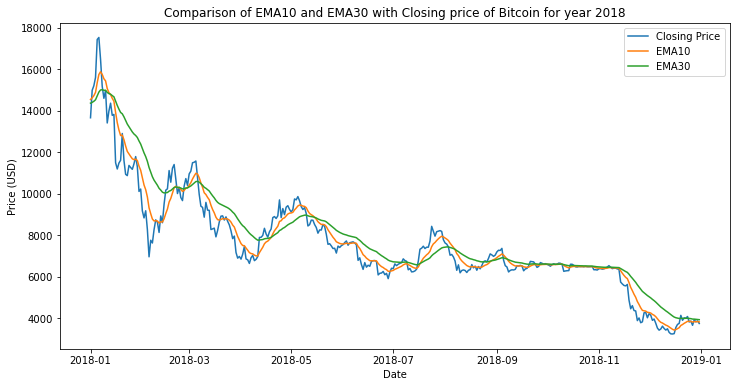

In [48]:
filtered_df = df[(df['Date'] >= pd.to_datetime('2018-01-01', format='%Y-%m-%d')) & (df['Date'] <= pd.to_datetime('2018-12-31', format='%Y-%m-%d'))]  # df with only dates of 2018
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Date'], filtered_df['Close'], label='Closing Price')   # create closing price line
plt.plot(filtered_df['Date'], filtered_df['EMA10'], label='EMA10')      # create EMA10 line
plt.plot(filtered_df['Date'], filtered_df['EMA30'], label='EMA30')    # create EMA30 line
plt.legend()   # add legend to identify each line
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Comparison of EMA10 and EMA30 with Closing price of Bitcoin for year 2018')
plt.show()

<big>Again, we can see that EMA10 is closer to the Closing Price in terms of similarity.This makes sense if we consider that the EMAn checks the last n days to compute the price, giving more weight to
the most recent ones. If n is too small, we can use EMA for short-term analysis and predictions, while if n is big, we can use it in a longer-term approach</big>

<big>From the first of the two diagramms, we can see that from its release till 2017 BTC's worth was almost stable. Suddenly in 2017 it's value started rising rappidly as more and more people
became involved with Bitcoins. However, this popularity didn't continue in 2018 where we observed a rapid decrease in the price from January to March.For the rest of the year, this decrease
was slower, but still prominent.From 2019 till 2021 BTC's worth was increased once again, untill finally in 2021 it was skyrocketed to new-found heights.</big>

## Part 2: Taking a deeper look into BTC history
<big>Now let's take a look at the fluctuations of the opening and closing price, and high and low price over the years. To get a better understanding of its impact in the global market, we 
will also try to visualize the volume and market capitalization of BTC.</big>

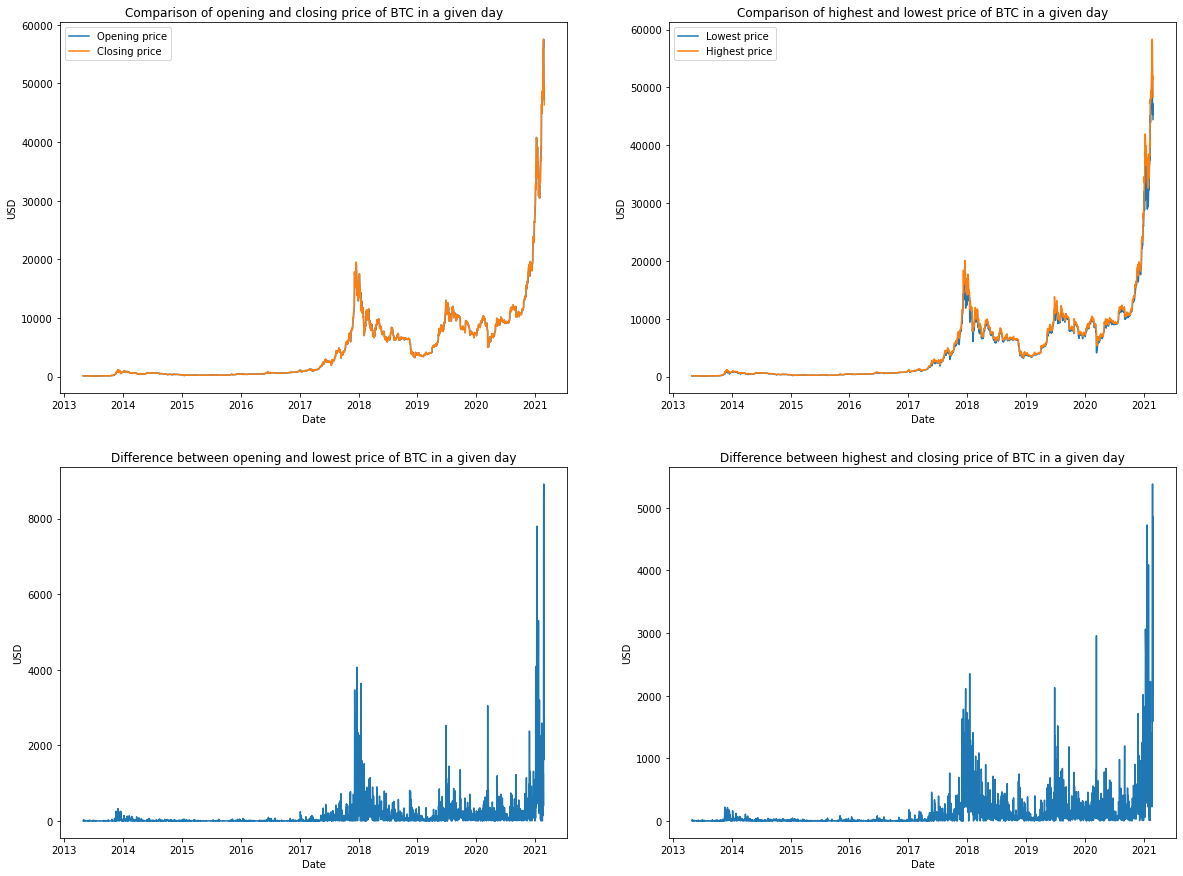

In [65]:
# the below diagramms show how the differernt prices changed since BTC's release
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(20,15))  # figure of dimensions 2x2 -> 4 diagramms

# for the first diagramm, we compare opening and closing prices
ax1.plot(df['Date'], df['Open'], label='Opening price')
ax1.plot(df['Date'], df['Close'], label='Closing price')
ax1.legend()
ax1.set_xlabel('Date')
ax1.set_ylabel('USD')
ax1.set_title('Comparison of opening and closing price of BTC in a given day')

# for the second diagramm, we compare highest and lowest price for each day
ax2.plot(df['Date'], df['Low'], label='Lowest price')
ax2.plot(df['Date'], df['High'], label='Highest price')
ax2.legend()
ax2.set_xlabel('Date')
ax2.set_ylabel('USD')
ax2.set_title('Comparison of highest and lowest price of BTC in a given day')

# in the third diagramm we see the difference between opening and lowest price
ax3.plot(df['Date'], df['Open']-df['Low'])
ax3.set_xlabel('Date')
ax3.set_ylabel('USD')
ax3.set_title('Difference between opening and lowest price of BTC in a given day')

ax4.plot(df['Date'], df['High']-df['Close'])
ax4.set_xlabel('Date')
ax4.set_ylabel('USD')
ax4.set_title('Difference between highest and closing price of BTC in a given day')

plt.show()



<big>These plots, show that opening and closing price of BTC each day, are very close to each other. Something similar is the case with highest and lowest price, although the difference between the two
is slightly bigger. From the bottom two diagramms we see that after 2018, the difference between opening and lowest price was steadily decreasing, which means that the opening price was coming closer to 
also being the lowest price. Similar things seem to appply to the closing price, as it can be infered by looking at the bottom-left diagramm.</big>

<big>To see how the difference between highest and lowest price, and opening and closing price is changed throughout the years, we create some new diagramms below</big>

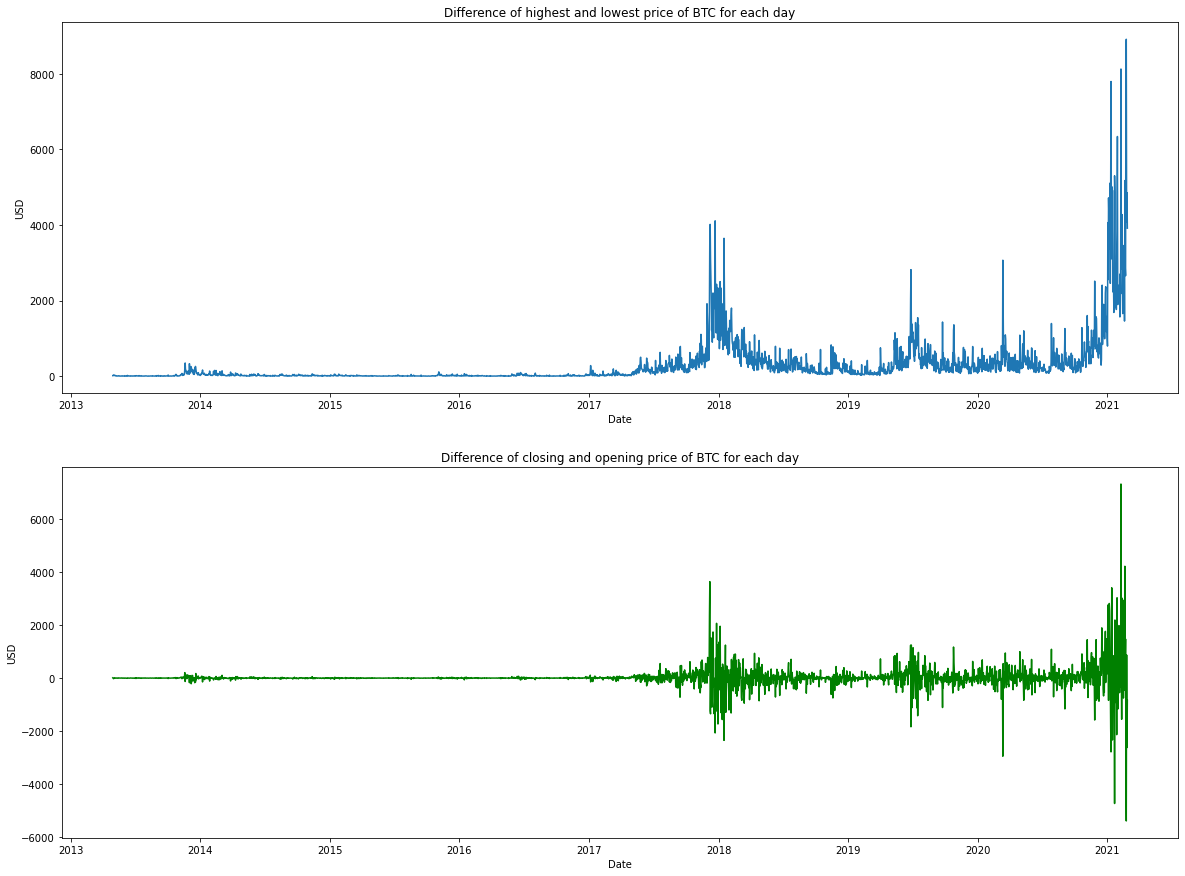

In [70]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(20,15))  # two plots, one below the other

# first plot, show difference between high and low price
ax1.plot(df['Date'], df['High']-df['Low'])
ax1.set_xlabel('Date')
ax1.set_ylabel('USD')
ax1.set_title('Difference of highest and lowest price of BTC for each day')

# second plot, show difference between opening and closing price
ax2.plot(df['Date'], df['Close']-df['Open'], 'g')
ax2.set_xlabel('Date')
ax2.set_ylabel('USD')
ax2.set_title('Difference of closing and opening price of BTC for each day')

plt.show()

<big>Looking above, we see that BTC's price within a day was remaining stable until 2017, when it started gaining popularity thus raising its value. From 2018 until the middle of 2020, 
the price was remaining relatively the same (2000 USD between highest and lowest price). After that time, BTC has been in a steady and rapid rise, with highest price moving further and further away 
from the lowest one. As far as opening and closing prices are concerned, we can infere from the last plot that there isn't a "rule" to define whether opening price is higher that the closing or vise
versa, although we can assume (based on the other diagramms) that higher popularity/interest can be translated in the diagramm as greater volatility of the positive/negative values(for example, in 2021 we see the one day the closing price being significantly higher than the opening, while the next day the opposite happens) </big>

<big> Now that we got some results from the previous diagramms, it is time to explore volume and market capitalization of BTC to see their change over time. According to the findings that will occur, we might also be able to understand why we got the previous results. For those who are not familiar with the terms, "volume" measures how many times a coin changes hands over a given time frame. In other words, it is thenumber of transactions made during that timeframe. In general, it reflects the interest about the specific currency.If  a coin has a high volume, that means that investors are interested in that coin, and we can expect the price to rise (conversely, if volume is low, this is an indicator that the price of this coin will drop). Also, higher volume tends to translate to higher price stability and less volatility. The term "market capitalization" is the total value of all the coins that have been mined. It is calculated by multiplying the number of coins in circulation, by the current market price of a single coin. We can think of this as a measure of stability of a given type of currency: the higher the market capitalization, the more stable the currency is. On the other hand, digital currencies with smaller market caps are more susceptible to the whims of the market – and can see huge gains or dramatic losses in their wake.</big>

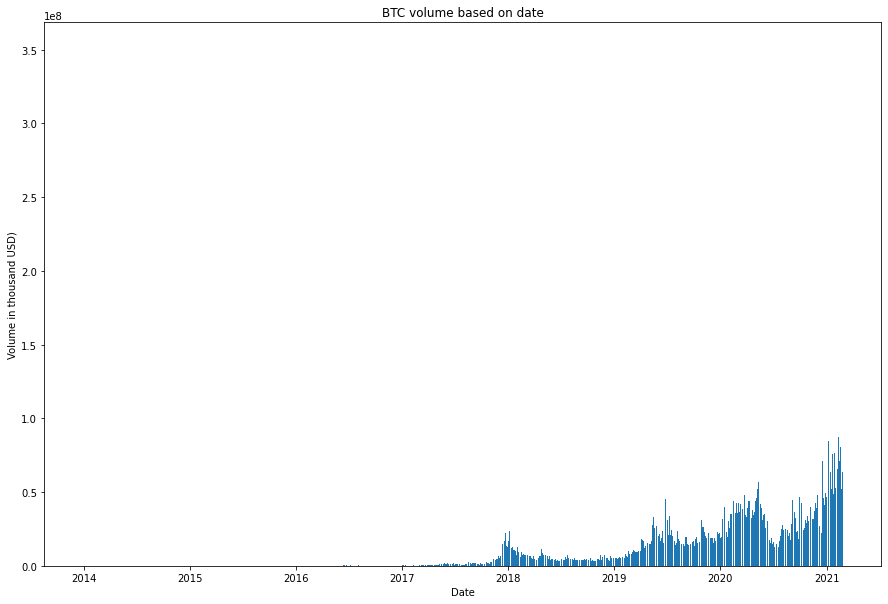

In [83]:
# first we create a bar chart to observe the growth of BTC volume
pos_df = df[df['Volume'] > 0]   # we create a new df (positive_df -> pos_df) were volume is greater than zero
plt.figure(figsize=(15,10))
plt.bar(pos_df['Date'], pos_df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume in thousand USD)')
plt.title('BTC volume based on date')
plt.show()

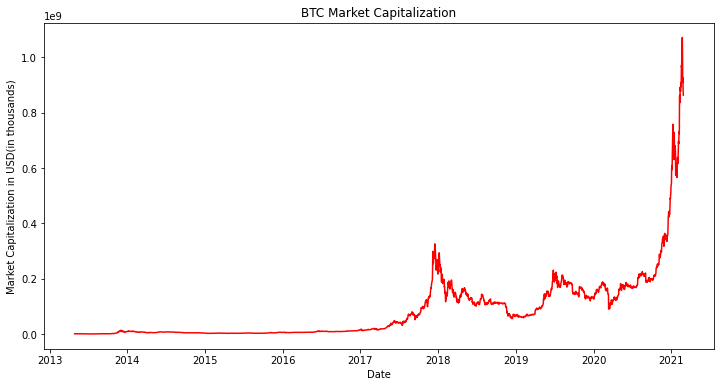

In [88]:
# now, we will create a simple line chart, that represents the market capitalization 
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Market Cap'], 'r')
plt.xlabel('Date')
plt.ylabel('Market Capitalization in USD(in thousands)')
plt.title('BTC Market Capitalization')
plt.show()

<big>The diagrams above show what we already know: until 2017 bitcoin was not so popular, then the investor's interest shifted towards it. After its first outburst, the interest decreased and BTC 
    had once again a low profile. What is important to outline from the "volume" diagramm is that whenever a sudden rise in interest occurs, after a while it declines, so given the rapid development 
    of Bitcoin in 2021 we could expect it to lose some of its current popularity (and probably its current value) in  the mid of 2021 till 2022.</big>

## Final Notes
<big> With all the information from the diagramms we created, we can actually sum up the history of Bitcoin as follow:\n    Although it was created in 2013, it never really gained much of the market spotlight until 2017. We can say that this was its "formal entrance" to the finance market, and despite the fact that at the end of 2017 it was in quite a good start, almost 4 more years were needed for it to regain its former glory. In 2021 BTC saw a profound growth both to its value and its popularity. However, by taking a closer look at all the diagramms above, we can see that 2021 lines resemble those of 2018, so we can expect the value to decrease in the years to come.\n    </big>